In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from stripes.detection import Detector
%matplotlib inline

Чтение файлов с диска:

In [2]:
def read_images(path):
    images_names = glob.glob(path + '/' + '*.jpg')
    return [cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB) for image_name in images_names]

images = read_images("../images/tables")
print len(images)

15


Размер итогового изображения с таблицей:

In [3]:
w_target, h_target = 148 * 5, 166 * 5
print "{} x {}" .format(w_target, h_target)

740 x 830


Координаты ячеек на шаблоне

In [4]:
scale_coeff = 5
coords_mm = {}

coords_mm['strip'] = ((128.5, 10.5), (138.5, 160.5))

coords_mm['LEU_1'] = ((38, 17), (47.5, 23))
coords_mm['LEU_2'] = ((77.5, 17), (87, 23))
coords_mm['LEU_3'] = ((90.5, 17), (100, 23))
coords_mm['LEU_4'] = ((103.5, 17), (113, 23))
coords_mm['LEU_5'] = ((117, 17), (126.5, 23))

coords_mm['NIT_1'] = ((38, 31), (47.5, 37))
coords_mm['NIT_2'] = ((90.5, 31), (100, 37))
coords_mm['NIT_3'] = ((117, 31), (126.5, 37))

coords_mm['URO_1'] = ((38, 45), (47.5, 51))
coords_mm['URO_2'] = ((50.5, 45), (60, 51))
coords_mm['URO_3'] = ((90.5, 45), (100, 51))
coords_mm['URO_4'] = ((103.5, 45), (113, 51))
coords_mm['URO_5'] = ((117, 45), (126.5, 51))

coords_mm['PRO_1'] = ((38, 61), (47.5, 67))
coords_mm['PRO_2'] = ((50.5, 61), (60, 67))
coords_mm['PRO_3'] = ((77.5, 61), (87, 67))
coords_mm['PRO_4'] = ((90.5, 61), (100, 67))
coords_mm['PRO_5'] = ((103.5, 61), (113, 67))
coords_mm['PRO_6'] = ((117, 61), (126.5, 67))

coords_mm['PH_1'] = ((38, 74), (47.5, 80))
coords_mm['PH_2'] = ((50.5, 74), (60, 80))
coords_mm['PH_3'] = ((64, 74), (73.5, 80))
coords_mm['PH_4'] = ((77.5, 74), (87, 80))
coords_mm['PH_5'] = ((90.5, 74), (100, 80))
coords_mm['PH_6'] = ((103.5, 74), (113, 80))
coords_mm['PH_7'] = ((117, 74), (126.5, 80))

coords_mm['BLO_1'] = ((38, 92), (47.5, 98))
coords_mm['BLO_2'] = ((50.5, 92), (60, 98))
coords_mm['BLO_3'] = ((64, 92), (73.5, 98))
coords_mm['BLO_4'] = ((77.5, 92), (87, 98))
coords_mm['BLO_5'] = ((90.5, 92), (100, 98))
coords_mm['BLO_6'] = ((103.5, 92), (113, 98))
coords_mm['BLO_7'] = ((117, 92), (126.5, 98))

coords_mm['SG_1'] = ((38, 104.5), (47.5, 110.5))
coords_mm['SG_2'] = ((50.5, 104.5), (60, 110.5))
coords_mm['SG_3'] = ((64, 104.5), (73.5, 110.5))
coords_mm['SG_4'] = ((77.5, 104.5), (87, 110.5))
coords_mm['SG_5'] = ((90.5, 104.5), (100, 110.5))
coords_mm['SG_6'] = ((103.5, 104.5), (113, 110.5))
coords_mm['SG_7'] = ((117, 104.5), (126.5, 110.5))

coords_mm['KET_1'] = ((38, 120), (47.5, 126))
coords_mm['KET_2'] = ((64, 120), (73.5, 126))
coords_mm['KET_3'] = ((77.5, 120), (87, 126))
coords_mm['KET_4'] = ((90.5, 120), (100, 126))
coords_mm['KET_5'] = ((103.5, 120), (113, 126))
coords_mm['KET_6'] = ((117, 120), (126.5, 126))

coords_mm['BIL_1'] = ((38, 135), (47.5, 141))
coords_mm['BIL_2'] = ((90.5, 135), (100, 141))
coords_mm['BIL_3'] = ((103.5, 135), (113, 141))
coords_mm['BIL_4'] = ((117, 135), (126.5, 141))

coords_mm['GLU_1'] = ((38, 153.5), (47.5, 159.5))
coords_mm['GLU_2'] = ((64, 153.5), (73.5, 159.5))
coords_mm['GLU_3'] = ((77.5, 153.5), (87, 159.5))
coords_mm['GLU_4'] = ((90.5, 153.5), (100, 159.5))
coords_mm['GLU_5'] = ((103.5, 153.5), (113, 159.5))
coords_mm['GLU_6'] = ((117, 153.5), (126.5, 159.5))

coords_scaled = {}
for key in coords_mm:
    coords_scaled[key] = ((int(coords_mm[key][0][0] * scale_coeff), int(coords_mm[key][0][1] * scale_coeff)),
                          (int(coords_mm[key][1][0] * scale_coeff), int(coords_mm[key][1][1] * scale_coeff)))
    
print coords_scaled

{'LEU_2': ((387, 85), (435, 115)), 'PH_6': ((517, 370), (565, 400)), 'NIT_1': ((190, 155), (237, 185)), 'NIT_3': ((585, 155), (632, 185)), 'NIT_2': ((452, 155), (500, 185)), 'PH_1': ((190, 370), (237, 400)), 'SG_3': ((320, 522), (367, 552)), 'PH_3': ((320, 370), (367, 400)), 'PH_2': ((252, 370), (300, 400)), 'PH_5': ((452, 370), (500, 400)), 'PH_4': ((387, 370), (435, 400)), 'PH_7': ((585, 370), (632, 400)), 'strip': ((642, 52), (692, 802)), 'PRO_1': ((190, 305), (237, 335)), 'SG_2': ((252, 522), (300, 552)), 'SG_1': ((190, 522), (237, 552)), 'PRO_2': ((252, 305), (300, 335)), 'PRO_5': ((517, 305), (565, 335)), 'PRO_3': ((387, 305), (435, 335)), 'SG_5': ((452, 522), (500, 552)), 'PRO_6': ((585, 305), (632, 335)), 'SG_7': ((585, 522), (632, 552)), 'PRO_4': ((452, 305), (500, 335)), 'SG_4': ((387, 522), (435, 552)), 'BIL_1': ((190, 675), (237, 705)), 'LEU_3': ((452, 85), (500, 115)), 'BIL_3': ((517, 675), (565, 705)), 'LEU_1': ((190, 85), (237, 115)), 'BIL_4': ((585, 675), (632, 705)), '

Предобработка (размеры ядер и параметры фильтров пока хардкод под картинки 1280х960)

In [5]:
def denoise(image, ksize=15):
    return cv2.medianBlur(image, ksize=ksize)


def binarize(image, blocksize=11, C=0):
    if len(image.shape) == 2:
        out = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                       cv2.THRESH_BINARY, blockSize=blocksize, C=C)
    else:
        out = cv2.adaptiveThreshold(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                       cv2.THRESH_BINARY, blockSize=blocksize, C=C)
    return out


def morphology_open(image, ksize=3):
    kernel = np.ones(ksize)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

Работа с контурами:

In [6]:
def get_max_area_contour_id(contours):
    max_area = 0.
    max_contour_id = -1
    for j, contour in enumerate(contours):
        new_area = cv2.contourArea(contour)
        if new_area >= max_area:
            max_area = new_area
            max_contour_id = j
    return max_contour_id


def approximate_contour(contour, eps=0.01):
    return cv2.approxPolyDP(contour, epsilon=eps*cv2.arcLength(contour, closed=True), closed=True)


def get_correct_arrangement(rect):
    """
    Find arrangment indices as follows
    # 0 -> 1
    # |    |
    # 3 <- 2
    """
    arrangement = [-1] * 4
    x1i, x2i, x3i, x4i = np.argsort(rect[:, 0])
    
    if rect[x1i, 1] > rect[x2i, 1]:
        arrangement[0] = x2i
        arrangement[3] = x1i
    else:
        arrangement[0] = x1i
        arrangement[3] = x2i

    if rect[x3i, 1] > rect[x4i, 1]:
        arrangement[1] = x4i
        arrangement[2] = x3i
    else:
        arrangement[2] = x4i
        arrangement[1] = x3i

    return arrangement

Преобразование изображения:

In [7]:
def get_warp_matrix(src_rect, dist_rect):
    h, status = cv2.findHomography(src_rect, dist_rect)
    return h


def warp(image, warp_matrix, dist_shape=(w_target, h_target)):
    return cv2.warpPerspective(image, warp_matrix, (w_target, h_target))

In [8]:
def run(image):
    
    # Предобработка
    image_denoised = denoise(image)
    image_binary = binarize(image_denoised)
    image_morph = morphology_open(image_binary)
    
    # Контуры
    r, contours, h = cv2.findContours(image_morph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    maxId = get_max_area_contour_id(contours)
    contour = contours[maxId]
    
    poly = approximate_contour(contour)
    if len(poly) != 4:
        print "Failed to approx with 4 points"
        return None
    image_contoured = image.copy()
    cv2.drawContours(image_contoured, [poly], 0, (255, 0, 0), 5)
    
    # Трансформация
    correct_arrangement = get_correct_arrangement(np.squeeze(poly, 1))
    src_rect = np.squeeze(poly, 1)[correct_arrangement]
    
    dist_rect = np.array([[[0, 0]],
                          [[w_target, 0]],
                          [[w_target, h_target]],
                          [[0, h_target]]])

    warp_matrix = get_warp_matrix(src_rect, dist_rect)
    image_warped = warp(image, warp_matrix)
    
    # Отрисовка ячеек
    for key, rect in coords_scaled.items():
        cv2.rectangle(image_warped, rect[0], rect[1], (255, 255, 0), 2)
    
    
    plt.figure(figsize=(15, 35))
    plt.subplot(1, 2, 1)
    plt.title("Contoured image")
    plt.imshow(image_contoured)
    plt.subplot(1, 2, 2)
    plt.title("Cropped image")
    plt.imshow(image_warped)
    plt.show()

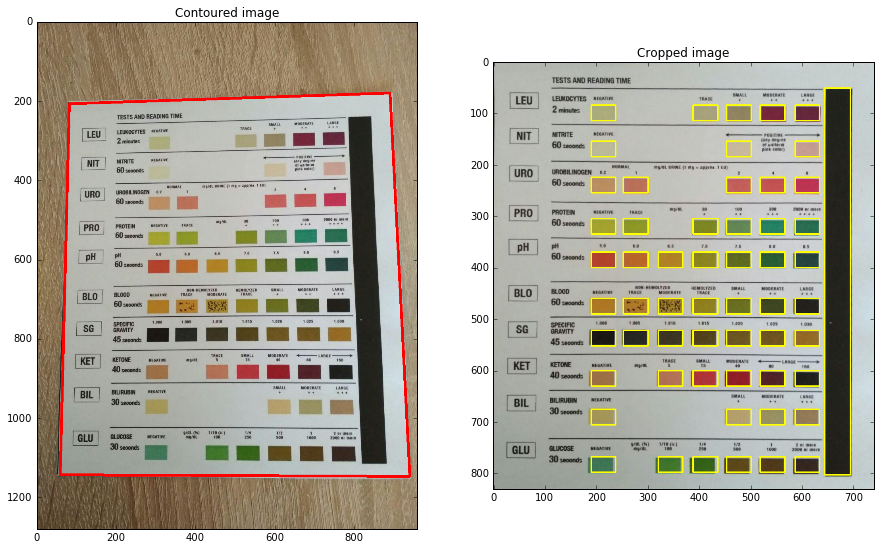

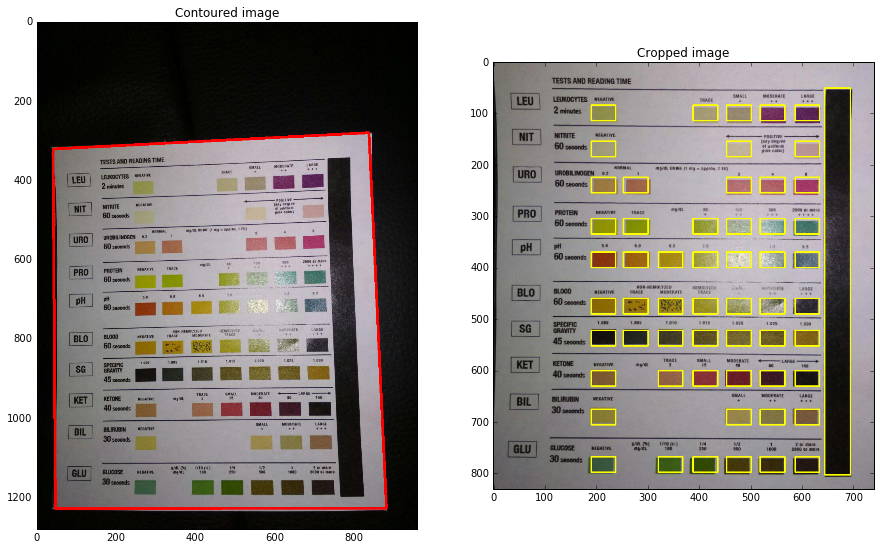

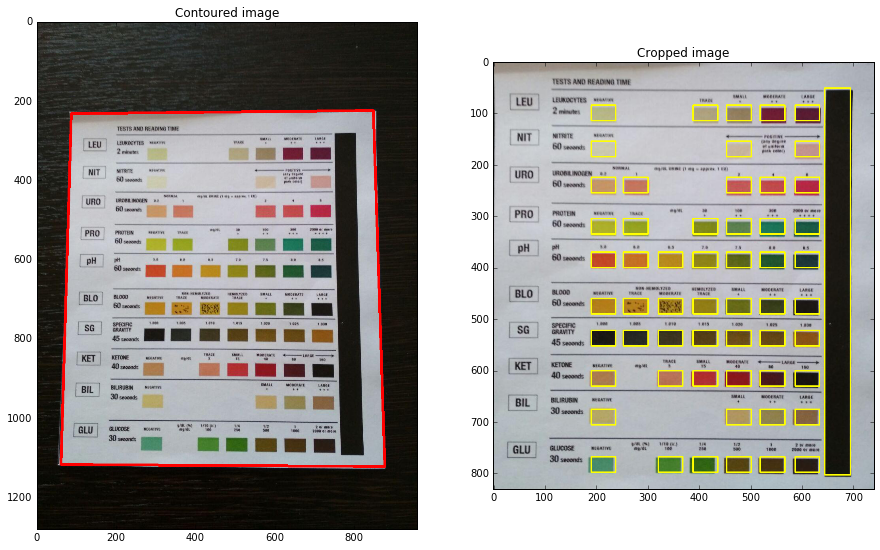

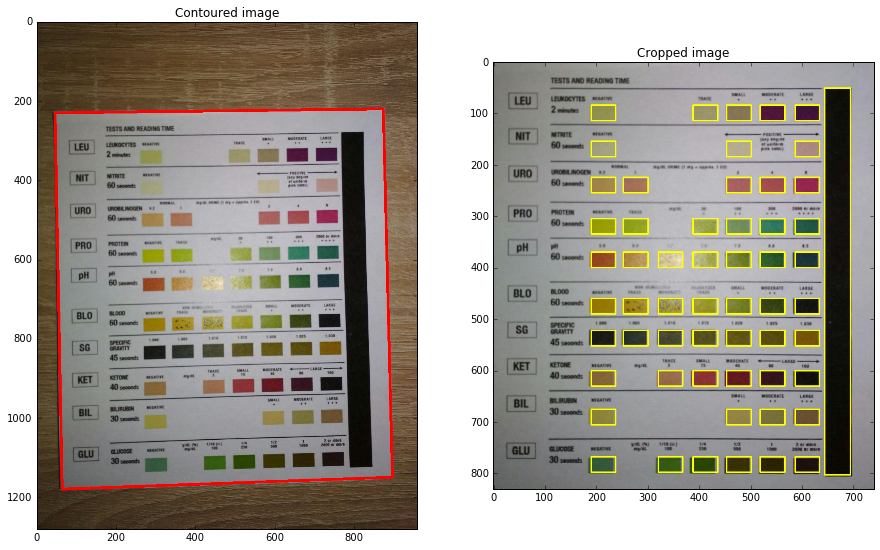

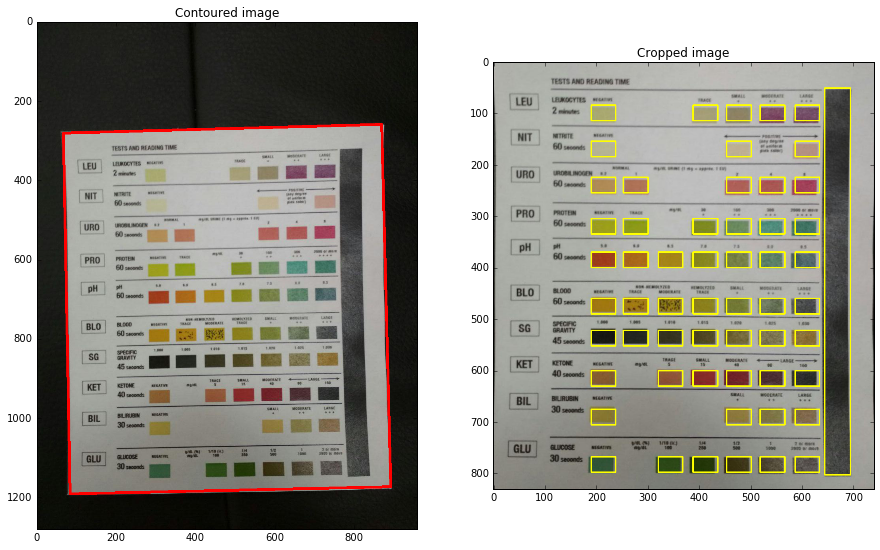

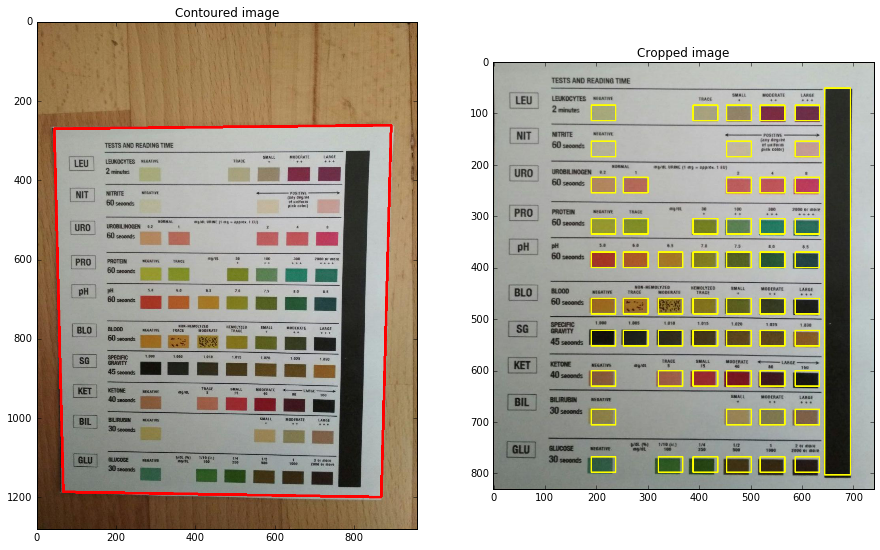

Failed to approx with 4 points


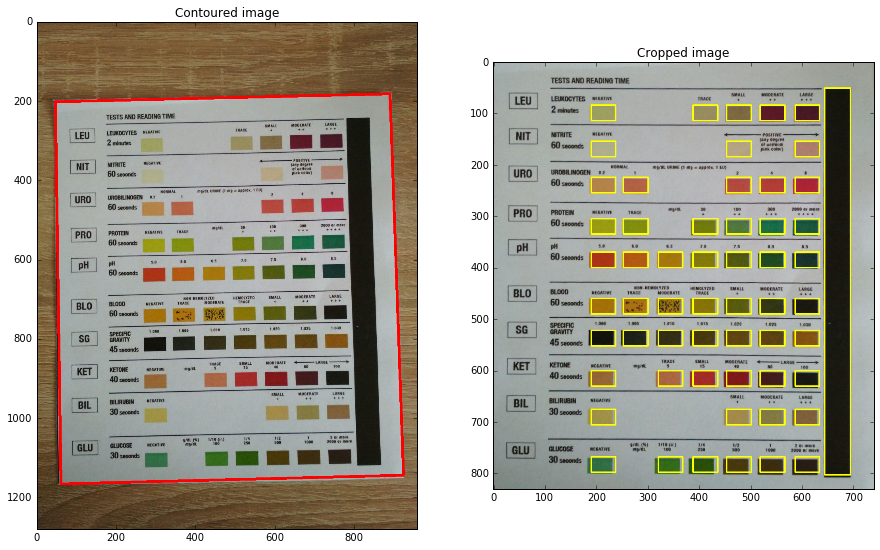

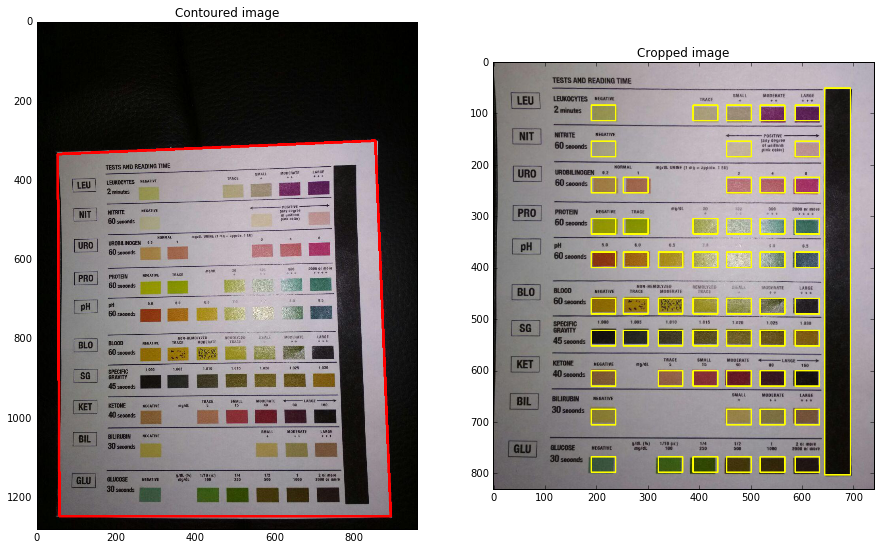

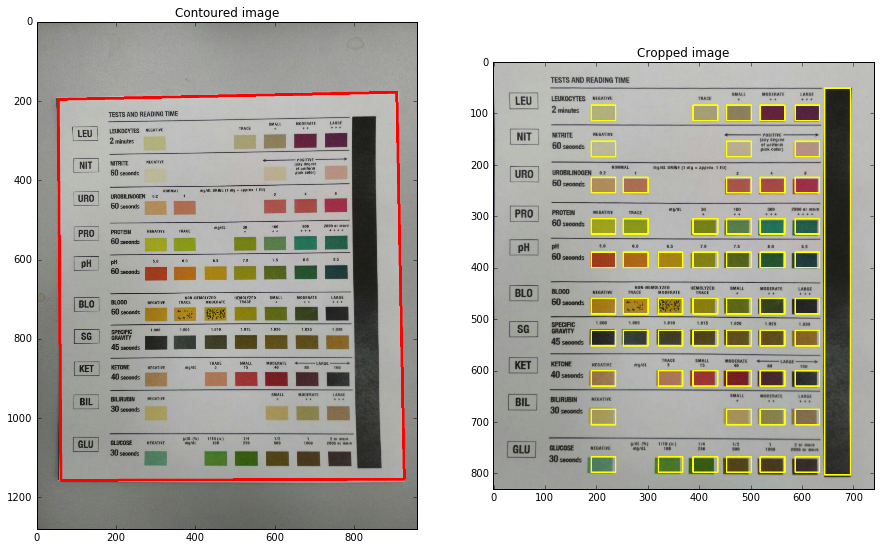

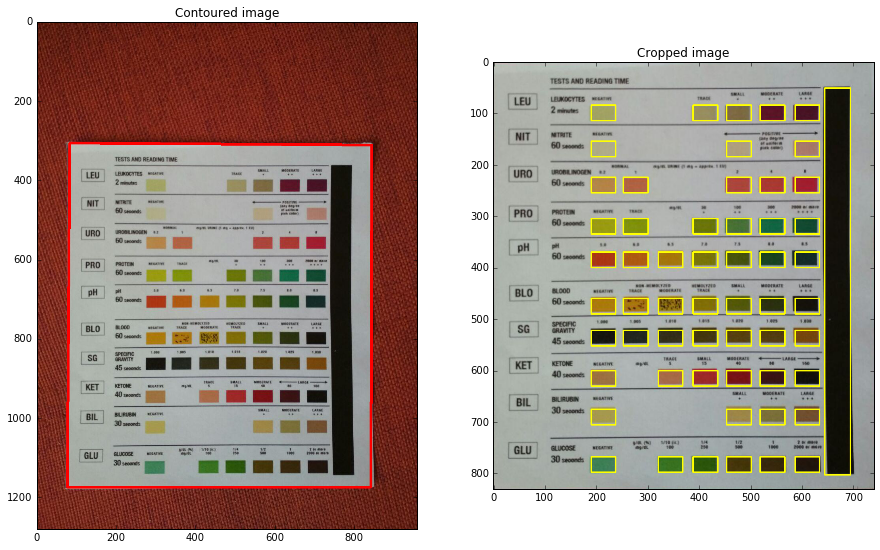

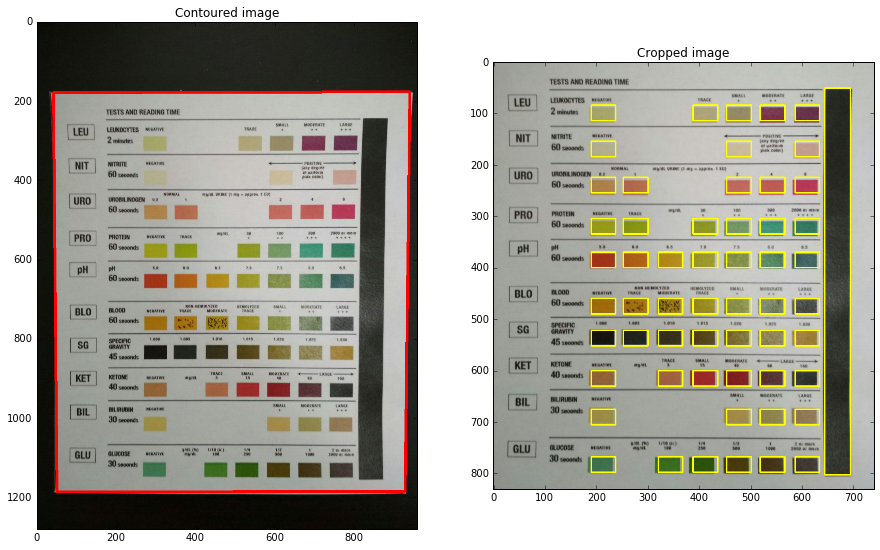

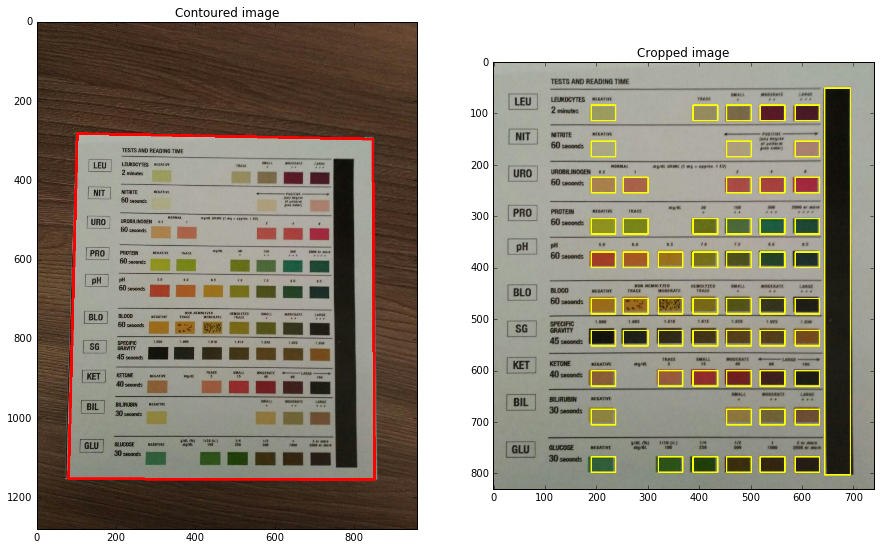

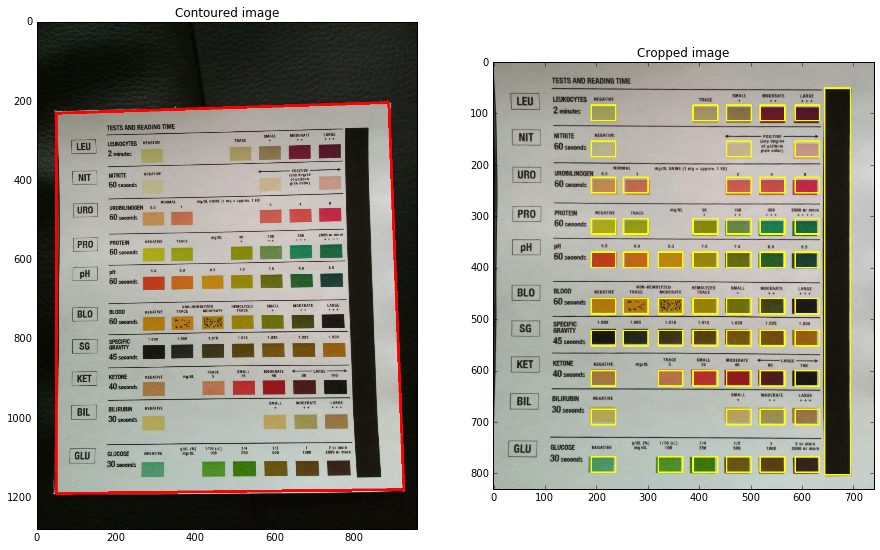

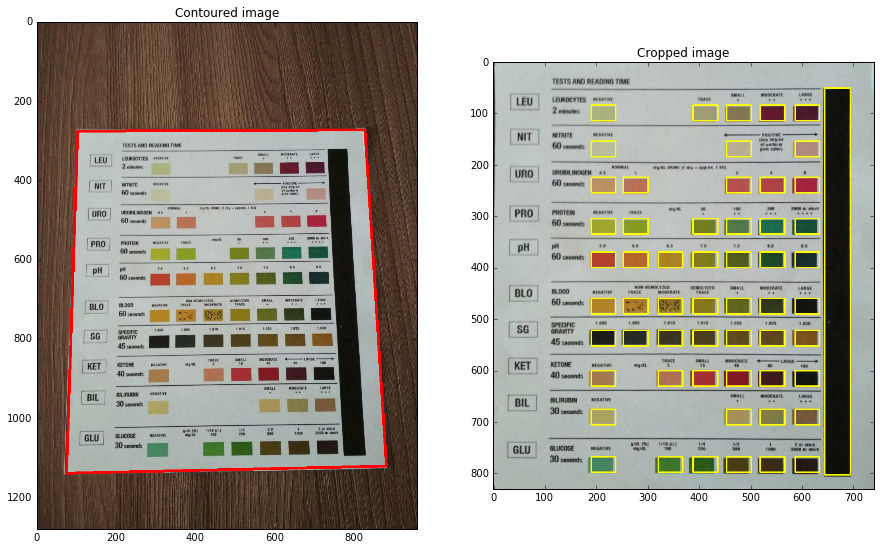

In [9]:
for image in images:
    run(image)

Комментарий:

* Фотографии с шаблоном на белом фоне не прокатят (для автоматической разметки; можно добавить режим ручного оконтуривания шаблона установкой 4 точек на картинку по углам шаблона)
* Печать на тонкой бумаге $\rightarrow$ листок по краям выгибается $\rightarrow$ трансформирование в прямоугольник происходит "с нятяжкой" к углам (может быть, добавить в центр шаблона опорную точку, чтобы она тоже учитывалась при трансформации?)